In [9]:
import pandas as pd
#data
dataset = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data_set_PBS3.csv', engine='python')

In [10]:
#check the shape of data
dataset.shape

(120, 9)

In [11]:
dataset.head(13)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,OM,0.0000,0.0000,0.7676,0.0000,14.1895,22.3215,0.0000,0.0000
1,PA,162.1620,125.0598,165.0538,0.0000,40.2492,64.0953,0.0000,0.0000
2,PA6,3.4433,2.8920,5.0061,0.0000,0.0000,0.0000,0.0000,0.0000
3,PAPER,0.0000,0.0000,0.0000,178.5325,177.9549,111.4207,0.0000,0.0000
4,PBS,143.1750,110.3610,250.6670,2.5530,36.4880,58.0520,0.0000,0.0000
5,PE,0.0000,0.0000,73.1115,0.0000,0.0000,0.0000,194.8407,30.0063
6,PETmono,4.2491,3.2417,0.0000,0.0000,47.1720,75.1594,0.0000,0.0000
7,PETp,0.0000,0.0000,196.5714,0.0000,0.0000,0.0000,0.0000,0.0000
8,PP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,138.5009,21.2797
9,PS,248.2050,191.4780,251.2935,0.0000,0.0000,0.0000,65.6080,9.9274


In [12]:
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (96, 9)
Unseen Data For Predictions: (24, 9)


In [14]:
#setting up the environment in Pycaret
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'MPs', session_id=123) 

,Description,Value
0,session_id,123
1,Target,MPs
2,Target Type,Multiclass
3,Label Encoded,"OM: 0, PA: 1, PA6: 2, PAPER: 3, PBS: 4, PE: 5, PETmono: 6, PETp: 7, PP: 8, PS: 9, PSf: 10, PVC: 11"
4,Original Data,"(96, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
#comparation of models to identify best model
best = compare_models(fold=7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.7543
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1529
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1186
lda,Linear Discriminant Analysis,0.9841,0.0000,0.9714,0.9841,0.9841,0.9824,0.9841,0.0143
nb,Naive Bayes,0.9397,0.0000,0.9270,0.9175,0.9249,0.9328,0.9392,0.0100
dt,Decision Tree Classifier,0.9095,0.0000,0.9004,0.8767,0.8868,0.8993,0.9080,0.0086
gbc,Gradient Boosting Classifier,0.8667,0.0000,0.8452,0.8444,0.8519,0.8520,0.8603,0.3771
knn,K Neighbors Classifier,0.8651,0.0000,0.8468,0.8056,0.8254,0.8482,0.8618,0.8929
lightgbm,Light Gradient Boosting Machine,0.8492,0.0000,0.8212,0.8198,0.8296,0.8310,0.8414,0.0629
ridge,Ridge Classifier,0.5794,0.0000,0.5232,0.4458,0.4878,0.5334,0.5668,0.0114


In [16]:
top3 = compare_models(fold=7,n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1471
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1486
et,Extra Trees Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1243
lda,Linear Discriminant Analysis,0.9841,0.0000,0.9714,0.9841,0.9841,0.9824,0.9841,0.0114
nb,Naive Bayes,0.9397,0.0000,0.9270,0.9175,0.9249,0.9328,0.9392,0.0129
dt,Decision Tree Classifier,0.9095,0.0000,0.9004,0.8767,0.8868,0.8993,0.9080,0.0100
gbc,Gradient Boosting Classifier,0.8667,0.0000,0.8452,0.8444,0.8519,0.8520,0.8603,0.4129
knn,K Neighbors Classifier,0.8651,0.0000,0.8468,0.8056,0.8254,0.8482,0.8618,0.0171
lightgbm,Light Gradient Boosting Machine,0.8492,0.0000,0.8212,0.8198,0.8296,0.8310,0.8414,0.0529
ridge,Ridge Classifier,0.5794,0.0000,0.5232,0.4458,0.4878,0.5334,0.5668,0.0100


In [17]:
print(top3)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, 

In [18]:
dt = create_model('et', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
dh = create_model('lr', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [20]:
de = create_model('rf', fold = 7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [69]:
tuned_dh = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9727,0.0000,0.9714,0.9591,0.9636,0.9696,0.9722
Std,0.0432,0.0000,0.0452,0.0648,0.0576,0.0482,0.0440


In [70]:
tuned_de = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.0000,0.9000,0.8636,0.8788,0.8981,0.9066
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9727,0.0000,0.9714,0.9591,0.9636,0.9696,0.9722
Std,0.0432,0.0000,0.0452,0.0648,0.0576,0.0482,0.0440


In [23]:
tuned_dt = tune_model(de, fold=7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.0000,0.9000,0.8500,0.8667,0.8889,0.8989
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9857,0.0000,0.9857,0.9786,0.9810,0.9841,0.9856
Std,0.0350,0.0000,0.0350,0.0525,0.0467,0.0389,0.0354


In [24]:
print(tuned_dt)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


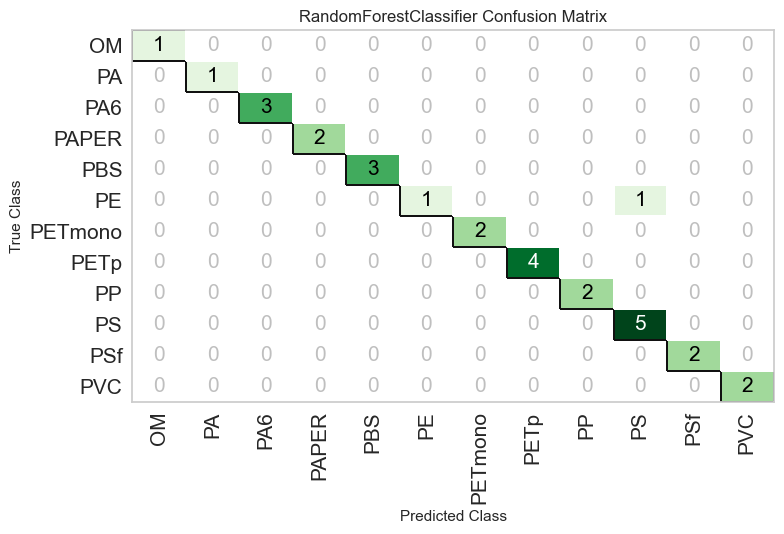

In [25]:
plot_model(tuned_dt, plot = 'confusion_matrix')

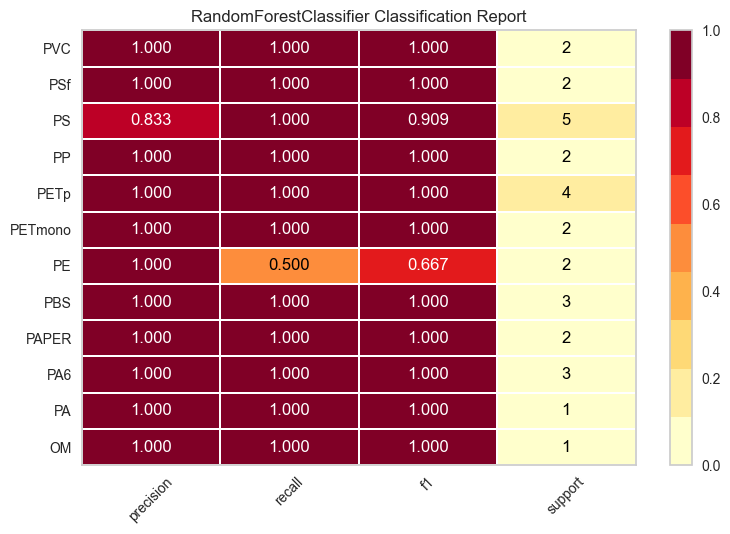

In [26]:
plot_model(tuned_dt, plot = 'class_report')

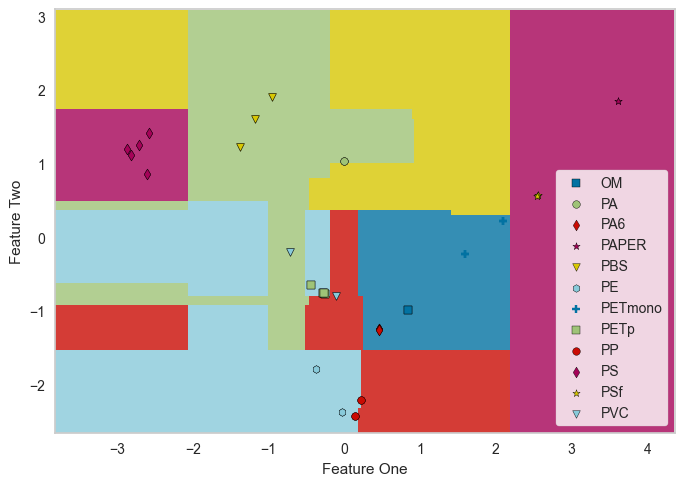

In [27]:
plot_model(tuned_dt, plot='boundary')

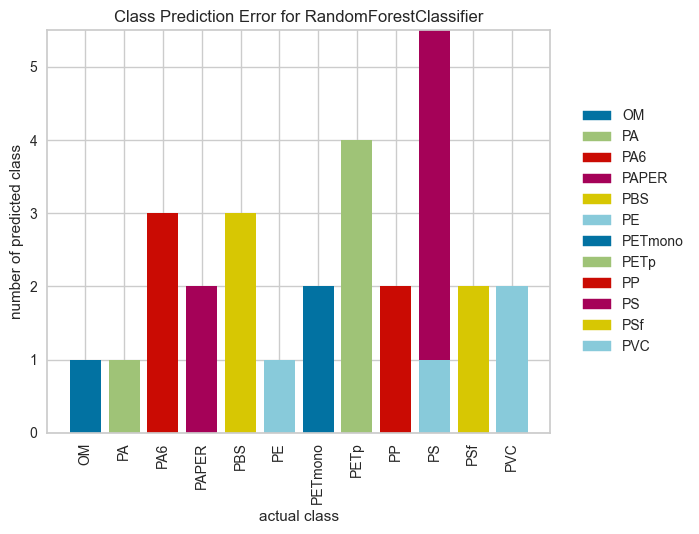

In [28]:
plot_model(tuned_dt, plot = 'error')

In [29]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9655,1.0000,0.9583,0.9713,0.9613,0.9615,0.9628


In [31]:
rfc = finalize_model(tuned_dt)

In [32]:
unseen_predictions = predict_model(rfc, data=data_unseen)
unseen_predictions.head(25)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PBS,143.1750,110.3610,250.66700,2.553,36.4880,58.0520,0.0000,0.000000,PBS,0.6446
1,PE,0.0000,0.0000,73.11150,0.000,0.0000,0.0000,194.8407,30.006300,PE,0.5797
2,PSf,0.0000,0.0000,0.00000,0.000,93.5659,149.3881,0.0000,0.000000,PSf,0.8804
3,PETmono,4.1411,3.4579,0.00000,0.000,52.6589,83.9551,0.0000,0.000000,PETmono,0.8812
4,PP,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,152.0678,23.393500,PP,0.8105
5,PSf,0.0000,0.0000,0.00000,0.000,94.3734,150.6735,0.0000,0.000000,PSf,0.6479
6,PVC,30.9560,24.1150,94.54260,0.000,0.0000,0.0000,0.0000,0.000000,PVC,0.7671
7,PETmono,4.0803,3.3077,0.00000,0.000,32.9582,52.4090,0.0000,0.000000,PETmono,0.4492
8,OM,0.0000,0.0000,1.64520,0.000,12.2231,19.2174,0.0000,0.000000,OM,0.8858
9,PA6,3.9319,3.2819,3.86170,0.000,0.0000,0.0000,0.0000,0.000000,PA6,0.7951


In [33]:
#saving the modelrfc
save_model(rfc,'Final etc Model 31May2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='MPs',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

In [40]:
saved_rfc3 = load_model('Final etc Model 31May2023')

Transformation Pipeline and Model Successfully Loaded


In [41]:
new_prediction = predict_model(saved_rfc3, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [42]:
new_prediction.head(25)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,PBS,143.1750,110.3610,250.66700,2.553,36.4880,58.0520,0.0000,0.000000,PBS,0.6446
1,PE,0.0000,0.0000,73.11150,0.000,0.0000,0.0000,194.8407,30.006300,PE,0.5797
2,PSf,0.0000,0.0000,0.00000,0.000,93.5659,149.3881,0.0000,0.000000,PSf,0.8804
3,PETmono,4.1411,3.4579,0.00000,0.000,52.6589,83.9551,0.0000,0.000000,PETmono,0.8812
4,PP,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,152.0678,23.393500,PP,0.8105
5,PSf,0.0000,0.0000,0.00000,0.000,94.3734,150.6735,0.0000,0.000000,PSf,0.6479
6,PVC,30.9560,24.1150,94.54260,0.000,0.0000,0.0000,0.0000,0.000000,PVC,0.7671
7,PETmono,4.0803,3.3077,0.00000,0.000,32.9582,52.4090,0.0000,0.000000,PETmono,0.4492
8,OM,0.0000,0.0000,1.64520,0.000,12.2231,19.2174,0.0000,0.000000,OM,0.8858
9,PA6,3.9319,3.2819,3.86170,0.000,0.0000,0.0000,0.0000,0.000000,PA6,0.7951


In [62]:
data2 = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/papertest.csv', engine='python')

In [63]:
data2

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th
0,GB005_3,0,0,0,0,159,254,0,0
1,GB070_F,0,0,0,0,152,248,0,0
2,Cont_2w,0,0,0,0,159,254,0,0
3,WT1,0,0,0,11,11,11,0,0
4,WT2,0,0,0,17,17,17,0,0
5,WET3,0,0,0,0,151,247,0,0


In [64]:
new_prediction = predict_model(saved_rfc3, data=data2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0,0,0,0,0,0


In [65]:
new_prediction.head(10)

,MPs,Rhodb_filter_Red_component_percentile_90th,Rhodb_filter_Green_ component_percentile_90th,nilre_filter_Red_component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_ Blue_ component_percentile_90th,Label,Score
0,GB005_3,0,0,0,0,159,254,0,0,PSf,0.6479
1,GB070_F,0,0,0,0,152,248,0,0,PSf,0.6479
2,Cont_2w,0,0,0,0,159,254,0,0,PSf,0.6479
3,WT1,0,0,0,11,11,11,0,0,OM,0.5329
4,WT2,0,0,0,17,17,17,0,0,OM,0.5329
5,WET3,0,0,0,0,151,247,0,0,PSf,0.6479


In [72]:
dfram = pd.DataFrame(new_prediction)

In [73]:
dfram.to_csv('papertest_samples_prediction.csv')